## this jupyter notebook requests moderator posts/comments from a predetermined moderator list and runs basic sklearn ML algorithms on a dataset comprised of moderators and suspicious accounts

In [113]:
import praw
import pandas as pd
import datetime
import numpy as np
import nltk
import sklearn
import sklearn.naive_bayes
import sklearn.neural_network
import sklearn.decomposition

import matplotlib.pyplot as plt #Plots
from matplotlib.colors import ListedColormap
import seaborn #Makes plots look nice, also heatmaps
secret = '***************************'
clientID =  '***************'
username = "*************"
password = "***********"

In [2]:
reddit = praw.Reddit(client_id= clientID,
                     client_secret= secret,
                     user_agent= '/u/' + username,
                     username= username,
                     password= password)
#convert the instance to read only mode by:
reddit.read_only = True

In [3]:
data = pd.read_excel('C:\\Users\\Andrew\\Documents\\jupyter studies\\reddit\\moderatorList.xlsx')
data.moderator = data.moderator.apply(lambda x: x.split()[0])

In [4]:
print(len(data))
data.head()

199


,moderator
0,SeasonFinale
1,stardigrada
2,PhantomMod
3,jwinterm
4,crypto_buddha


In [5]:
#request moderator data
name = []
submiss = []
commen = []
acctDat = []
postDat = []
subRedd = []
urlLink = []
upper = []
downer = []
rePort = []
otherComms = []
y =0

for every in data.moderator:
    z = 0
    try:
        print(every)
        user = reddit.redditor(every)
        y=y+1
        print(y)
        try:
            for submission in user.submissions.controversial('all'):
                if z >74:
                    break
                z=z+1
                try:
                    a = user
                    b = submission.title
                    c = ''
                    d = user.created_utc
                    e = submission.created_utc
                    f = submission.subreddit.display_name
                    g = submission.url
                    h = submission.ups
                    i = submission.downs
                    j = submission.num_reports
                    k = ''
                    try:
                        for top_level_comment in submission.comments:
                            k = k+' '+top_level_comment.body
                    except:
                        k=''
                    name.append(a)
                    submiss.append(b)
                    commen.append(c)
                    acctDat.append(d)
                    postDat.append(e)
                    subRedd.append(f)
                    urlLink.append(g)
                    upper.append(h)
                    downer.append(i)
                    rePort.append(j)
                    otherComms.append(k)
                except:
                    print('error in specific submission for: '+ every)
        except:
            print('error in submissions for: '+every)

        try:
            for comment in user.comments.controversial('all'):
                if z>150:
                    break
                z=z+1
                try:
                    l = user
                    m = ''
                    n = comment.body
                    o = user.created_utc
                    p = comment.created_utc
                    q = comment.subreddit.display_name
                    r = ''
                    s = comment.ups
                    t = comment.downs
                    u = comment.num_reports
                    v = ''
                    try:
                        for top_level_reply in comment.replies:
                            v = v+' '+top_level_reply.body
                    except:
                        v=''
                    name.append(l)
                    submiss.append(m)
                    commen.append(n)
                    acctDat.append(o)
                    postDat.append(p)
                    subRedd.append(q)
                    urlLink.append(r)
                    upper.append(s)
                    downer.append(t)
                    rePort.append(u)
                    otherComms.append(v)
                except:
                    print('error in specific comment for: '+every)
        except:
            print('error in comments for: '+every)
    except:
        print('error for user: '+ every)
real_people = pd.DataFrame(
    {'user': name,
     'post': submiss,
     'comment': commen,
     'creation':acctDat,
     'date':postDat,
     'subReddit': subRedd,
     'link':urlLink,
     'ups':upper,
     'downs':downer,
     'reports':rePort,
     'replies':otherComms
    })


SeasonFinale
1
stardigrada
2
PhantomMod
3
jwinterm
4
crypto_buddha
5
socialcadabra
6
CryptoCurrencyMod
7
SamsungGalaxyPlayer
8
INGWR
9
doug3465
10
AdamSC1
11
_I_Am_Chaos_
12
PrinceKael
13
ThatWunderkind
14
wannabelikeme
15
CryptoMaximalist
16
LargeSnorlax
17
millerb7
18
macktastick
19
Kylde
20
DuckDragon
21
Kensin
22
funny_mod
23
MrAwkwardCrotch
24
Umdlye
25
llehsadam
26
Covane
27
BestRbx
28
RamsesThePigeon
29
UMKcentersnare
30
verdatum
31
BabyMonkeyOnPig
32
Axanery
33
KaitlynnS
34
dearmusic
35
Phallindrome
36
jupiterq
37
v6s
38
colburp
39
afarmer2005
40
BurntToast13
41
WindAeris
42
AvadaKedavra03
43
mmm_toasty
44
siouxsie_siouxv2
45
awkwardtheturtle
46
Sanlear
47
kingeryck
48
ucantsimee
49
NeedHelpWithExcel
50
mvea
51
GallowBoob
52
YoStephen
53
ReBurnInator
54
JerryfromTomandJerry
55
Menial_Tasking
56
Occlpv2
57
AddictedReddit
58
BlatantConservative
59
douglasmacarthur
60
Kylde
61
CandyManCan
62
Elderthedog
63
LuckyBdx4
64
ani625
65
pomosexuality
66
luster
67
RNews_Mod
68
hoosakiwi
69

In [6]:
real_people['count']=1
real_people['pos']=0
real_people['com']=0
real_people['hack']=0
for index, row in real_people.iterrows():
    if len(row.comment)>0:
        real_people.loc[index,'com']=1
    if len(row.post)>0:
        real_people.loc[index,'pos']=1

In [7]:
real_people.to_pickle('C:\\Users\\Andrew\\Documents\\jupyter studies\\reddit\\normies.pkl')


In [8]:
len(real_people)

27708

In [9]:
real_people.head()

,comment,creation,date,downs,link,post,replies,reports,subReddit,ups,user,count,pos,com,hack
0,,1.348022e+09,1.361837e+09,0,http://i.imgur.com/vHaGv5A.jpg,Oscars 2013 Highlight - Sandra Bullock acciden...,(At ~2h3m into the broadcast) Definitely not ...,None,funny,2,SeasonFinale,1,1,0,0
1,,1.348022e+09,1.386393e+09,0,http://i.imgur.com/lfip68Y.jpg,New DIY technique for easy cold storage,,None,BitcoinFunny,0,SeasonFinale,1,1,0,0
2,,1.348022e+09,1.385175e+09,0,http://i.imgur.com/BxZpwan.jpg,Bitcoin vs. Litecoin,,None,BitcoinFunny,2,SeasonFinale,1,1,0,0
3,,1.348022e+09,1.385175e+09,0,http://i.imgur.com/TAHgUPy.jpg,Control of Bitcoin,,None,BitcoinFunny,0,SeasonFinale,1,1,0,0
4,,1.348022e+09,1.384740e+09,0,https://www.reddit.com/r/mac/comments/1qv4hu/l...,Low power graphics cards for Mac Pro?,Have you tried cleaning the GPU?\n\nhttps://d...,None,mac,0,SeasonFinale,1,1,0,0


In [10]:
print(len(real_people[real_people.pos==1]))
print(len(real_people[real_people.com==1]))
print(len(real_people[real_people.hack==1]))
print(len(real_people))

12398
15310
0
27708


In [12]:
suspicion = pd.read_pickle('C:\\Users\\Andrew\\Documents\\jupyter studies\\reddit\\suspicion.pkl')

In [13]:
#concatenate moderator and suspicious account dataframes
frames = [real_people, suspicion]

data = pd.concat(frames)

In [14]:
data.head()

,com,comment,count,creation,date,downs,hack,link,pos,post,replies,reports,subReddit,ups,user
0,0,,1,1.348022e+09,1.361837e+09,0,0,http://i.imgur.com/vHaGv5A.jpg,1,Oscars 2013 Highlight - Sandra Bullock acciden...,(At ~2h3m into the broadcast) Definitely not ...,None,funny,2,SeasonFinale
1,0,,1,1.348022e+09,1.386393e+09,0,0,http://i.imgur.com/lfip68Y.jpg,1,New DIY technique for easy cold storage,,None,BitcoinFunny,0,SeasonFinale
2,0,,1,1.348022e+09,1.385175e+09,0,0,http://i.imgur.com/BxZpwan.jpg,1,Bitcoin vs. Litecoin,,None,BitcoinFunny,2,SeasonFinale
3,0,,1,1.348022e+09,1.385175e+09,0,0,http://i.imgur.com/TAHgUPy.jpg,1,Control of Bitcoin,,None,BitcoinFunny,0,SeasonFinale
4,0,,1,1.348022e+09,1.384740e+09,0,0,https://www.reddit.com/r/mac/comments/1qv4hu/l...,1,Low power graphics cards for Mac Pro?,Have you tried cleaning the GPU?\n\nhttps://d...,None,mac,0,SeasonFinale


In [15]:
data.tail()

,com,comment,count,creation,date,downs,hack,link,pos,post,replies,reports,subReddit,ups,user
9403,0,,1,1.446816e+09,1.462453e+09,0,1,http://i.imgur.com/ggdIwbA.jpg,1,Hillary = Satan,"Even Satan is like ""what fucking hell hole di...",None,The_Donald,1152,rubinjer
9404,0,,1,1.446816e+09,1.458050e+09,0,1,http://i.imgur.com/kY9JRfz.gifv,1,"Cop knocks woman out, says she's faking it","she is faking it, you can see in the actual v...",None,Bad_Cop_No_Donut,83,rubinjer
9405,0,,1,1.446816e+09,1.447917e+09,0,1,http://i.imgur.com/RETy2D1.gifv,1,Real-life Terminator,This man is an accomplished trick and competi...,None,gifs,9,rubinjer
9406,0,,1,1.446816e+09,1.456758e+09,0,1,http://i.imgur.com/6w5kuIL.gifv,1,Eating at a Waffle House full of cops,,None,gifs,24262,rubinjer
9407,0,,1,1.446816e+09,1.464617e+09,0,1,http://i.imgur.com/MOviKBm.gifv,1,Turn on Mortal Kombat main theme song and watc...,[Here ya go](https://gifsound.com/?gifv=MOviK...,None,gifs,11,rubinjer


In [16]:
len(data)

36188

In [34]:
data['text']=''
for index, row in data.iterrows():
    if row.pos==1:
        data.loc[index,'text']=row.post
    elif row.com==1:
        data.loc[index,'text']= row.comment
    else: print(index)

## normalize text, generate tfidf vectors (functions written by TAs from Content-Analyis-2018 course)
# https://github.com/Computational-Content-Analysis-2018

In [111]:

stop_words_basic = nltk.corpus.stopwords.words('english')
stemmer_basic = nltk.stem.snowball.SnowballStemmer('english')
lemmer_basic = nltk.stem.WordNetLemmatizer()

def normalizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)

    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)

    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

def generateVecs(df):
    df['tokenized_text'] = df['text'].apply(lambda x: nltk.word_tokenize(x))
    df['normalized_text'] = df['tokenized_text'].apply(lambda x: normalizeTokens(x, stopwordLst = stop_words_basic, stemmer = stemmer_basic))
    redditCountVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
    redditVects = redditCountVectorizer.fit_transform([' '.join(l) for l in df['normalized_text']])
    df['vect'] = [np.array(v).flatten() for v in redditVects.todense()]
    return df
def evaluateClassifier(clf, testDF):
    predictions = clf.predict(np.stack(testDF['vect'], axis=0))
    classes = []
    results = {
        'Error_Rate' : [],
        'AUC' : [],
        'Precision' : [],
        'Average_Precision' : [],
        'Recall' : [],
        }

    for cat in set(testDF['hack']):
        preds = [True if (c == cat) else False for c in predictions]
        acts = [True if (c == cat) else False for c in testDF['hack']]
        classes.append(cat)
        results['AUC'].append(sklearn.metrics.roc_auc_score(acts, preds))
        results['Average_Precision'].append(sklearn.metrics.average_precision_score(acts, preds))
        results['Precision'].append(sklearn.metrics.precision_score(acts, preds))
        results['Recall'].append(sklearn.metrics.recall_score(acts, preds))
        results['Error_Rate'].append(1 -  sklearn.metrics.accuracy_score(acts, preds))
    df = pd.DataFrame(results, index=classes)
    df.index.rename('hack', inplace=True)
    return df

def plotConfusionMatrix(clf, testDF):
    predictions = clf.predict(np.stack(testDF['vect'], axis=0))
    mat = sklearn.metrics.confusion_matrix(predictions, testDF['hack'])
    seaborn.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                    xticklabels=testDF['hack'].unique(), yticklabels=testDF['hack'].unique())
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title("Confusion Matrix")
    plt.show()
    plt.close()
    
def plotMultiROC(clf, testDF):
    #By making the column names variables we can easily use this function on new data sets

    #Get the names of each of the possible classes and the probabiltiess
    classes = clf.classes_
    try:
        probs = clf.predict_proba(np.stack(testDF['vect'], axis=0))
    except AttributeError:
        print("The {} classifier does not apear to support prediction probabilties, so an ROC curve can't be created. You can try adding `probability = True` to the model specification or use a different model.".format(type(clf)))
        return
    predictions = clf.predict(np.stack(testDF['vect'], axis=0))

    #setup axis for plotting
    fig, ax = plt.subplots(figsize = (10,10))

    #We can return the AUC values, in case they are useful
    aucVals = []
    for classIndex, className in enumerate(classes):        #Setup binary classes
        truths = [1 if c == className else 0 for c in testDF['hack']]
        predict = [1 if c == className else 0 for c in predictions]
        scores = probs[:, classIndex]

        #Get the ROC curve
        fpr, tpr, thresholds = sklearn.metrics.roc_curve(truths, scores)
        auc = sklearn.metrics.auc(fpr, tpr)
        aucVals.append(auc)

        #Plot the class's line
        ax.plot(fpr, tpr, label = "{} (AUC ${:.3f}$)".format(str(className).split(':')[0], auc))

    #Make the plot nice, then display it
    ax.set_title('Receiver Operating Characteristics')
    plt.plot([0,1], [0,1], color = 'k', linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc = 'lower right')
    plt.show()
    plt.close()
    #return aucVals

def plotregions(clf, df, h = .01):
    if np.random.choice(df['vect']).shape[0] > 2:
        pca = sklearn.decomposition.PCA(n_components = 2)
        reduced_data = pca.fit_transform(np.stack(df['vect'], axis=0))
        transformedDF = pd.DataFrame({'vect' : [r for r in reduced_data], 'hack' : df['hack']})
    else:
        transformedDF = df
    catsMap = {c : i for i, c in enumerate(np.unique(df['hack']))}

    fig, ax = plt.subplots(figsize = (10,10))
    ax.axis('off')
    pallet = seaborn.color_palette(palette='coolwarm', n_colors = len(set(transformedDF['hack'])))

    if np.random.choice(df['vect']).shape[0] > 2:
        xx, yy = np.meshgrid(np.arange(1.1 * reduced_data[:,0].min(),
                1.1 * reduced_data[:,0].max(), h),
            np.arange(1.1 * reduced_data[:,1].min(),
                1.1 * reduced_data[:,1].max(), h))
        Z = clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    else:
        reduced_data = np.stack(df['vect'], axis=0)
        xx, yy = np.meshgrid(np.arange(1.1 * reduced_data[:,0].min(),
                1.1 * reduced_data[:,0].max(), h),
            np.arange(1.1 * reduced_data[:,1].min(),
                1.1 * reduced_data[:,1].max(), h))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.vectorize(lambda x: catsMap[x])(Z)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    for i, cat in enumerate(set(df['hack'])):
        a = np.stack(transformedDF[transformedDF['hack'] == cat]['vect'])
        ax.scatter(a[:,0], a[:, 1], c = pallet[catsMap[cat]], label = cat)
    ax.legend(loc = 'center right', title = 'Categories')
    plt.show()
    plt.close()

In [53]:
bata = data.dropna(subset=['text']) 

In [54]:
len(bata)

36188

In [55]:
len(data)

36188

In [84]:
bata = generateVecs(data)

In [85]:
bata.head()

,com,comment,count,creation,date,downs,hack,link,pos,post,replies,reports,subReddit,ups,user,text,tokenized_text,normalized_text,vect
0,0,,1,1.348022e+09,1.361837e+09,0,0,http://i.imgur.com/vHaGv5A.jpg,1,Oscars 2013 Highlight - Sandra Bullock acciden...,(At ~2h3m into the broadcast) Definitely not ...,None,funny,2,SeasonFinale,Oscars 2013 Highlight - Sandra Bullock acciden...,"[Oscars, 2013, Highlight, -, Sandra, Bullock, ...","[oscar, highlight, sandra, bullock, accident, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0,,1,1.348022e+09,1.386393e+09,0,0,http://i.imgur.com/lfip68Y.jpg,1,New DIY technique for easy cold storage,,None,BitcoinFunny,0,SeasonFinale,Hillary's war on Black Americans,"[Hillary, 's, war, on, Black, Americans]","[hillari, war, black, american]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0,,1,1.348022e+09,1.385175e+09,0,0,http://i.imgur.com/BxZpwan.jpg,1,Bitcoin vs. Litecoin,,None,BitcoinFunny,2,SeasonFinale,Hillary's war on Black Americans,"[Hillary, 's, war, on, Black, Americans]","[hillari, war, black, american]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0,,1,1.348022e+09,1.385175e+09,0,0,http://i.imgur.com/TAHgUPy.jpg,1,Control of Bitcoin,,None,BitcoinFunny,0,SeasonFinale,Cops really be trying hard to take non-black p...,"[Cops, really, be, trying, hard, to, take, non...","[cop, realli, tri, hard, take, peopl, aliv]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0,,1,1.348022e+09,1.384740e+09,0,0,https://www.reddit.com/r/mac/comments/1qv4hu/l...,1,Low power graphics cards for Mac Pro?,Have you tried cleaning the GPU?\n\nhttps://d...,None,mac,0,SeasonFinale,Milwaukee Police Chief: Some Arrests Made but ...,"[Milwaukee, Police, Chief, :, Some, Arrests, M...","[milwauke, polic, chief, arrest, made, citi, c...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [65]:
    count=0
for index, row in data.iterrows():

     if len(row.normalized_text)<1 and row.hack==1:
        count=count+1
#         print(index)
#         print(row.text)
print(count)

116


In [36]:
data.to_pickle('C:\\Users\\Andrew\\Documents\\jupyter studies\\reddit\\AllAccounts.pkl')

split data into test and training sets

In [86]:
msk=np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [87]:
len(train)

29040

In [88]:
len(train[train.hack==0])

22188

In [89]:
len(train[train.hack==1])

6852

In [90]:
len(test[test.hack==0])

5520

In [91]:
len(test[test.hack==1])

1628

In [92]:
len(test)

7148

In [44]:
train.to_pickle('C:\\Users\\Andrew\\Documents\\jupyter studies\\reddit\\train.pkl')

In [45]:
test.to_pickle('C:\\Users\\Andrew\\Documents\\jupyter studies\\reddit\\test.pkl')

sklearn naive bayes classsifier

In [93]:
naive = sklearn.naive_bayes.GaussianNB()

In [94]:
naive.fit(np.stack(train['vect'], axis=0), train['hack'])

GaussianNB(priors=None)

In [100]:
evaluateClassifier(naive, test)

,AUC,Average_Precision,Error_Rate,Precision,Recall
hack,,,,,
0,0.567392,0.798262,0.553442,0.847556,0.345471
1,0.567392,0.255063,0.553442,0.262352,0.789312


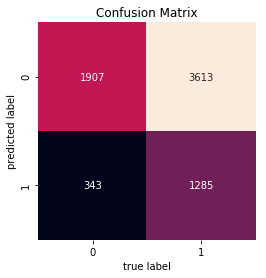

In [105]:
plotConfusionMatrix(naive, test)

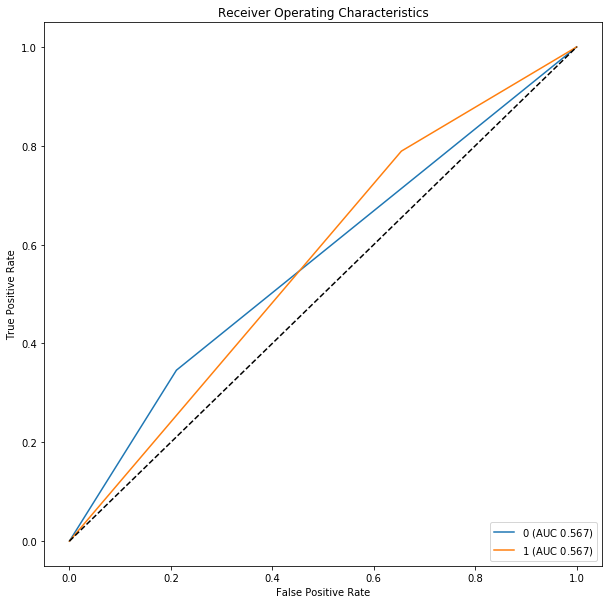

In [106]:
plotMultiROC(naive, test)

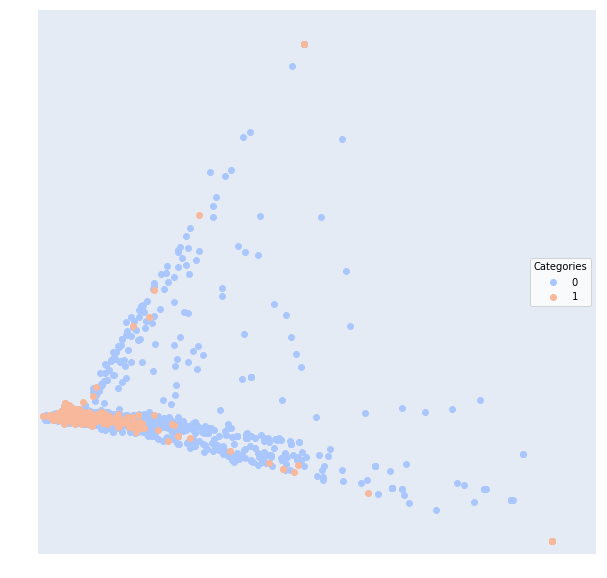

In [112]:
plotregions(naive, test)

sklearn neural network classifier

In [114]:
neuro = sklearn.neural_network.MLPClassifier()

In [116]:
neuro.fit(np.stack(train['vect'], axis=0), train['hack'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [117]:
evaluateClassifier(neuro, test)

,AUC,Average_Precision,Error_Rate,Precision,Recall
hack,,,,,
0,0.384787,0.734423,0.425434,0.720669,0.733333
1,0.384787,0.220899,0.425434,0.038537,0.036241


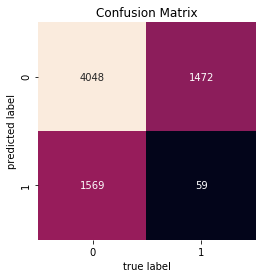

In [119]:
plotConfusionMatrix(neuro, test)

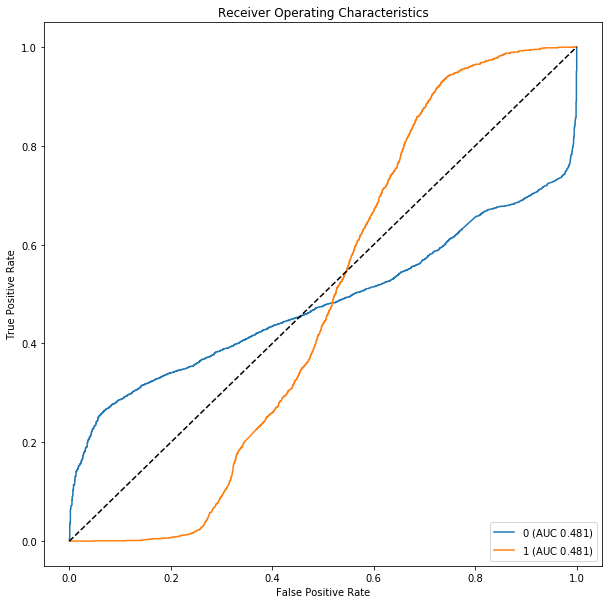

In [118]:
plotMultiROC(neuro, test)

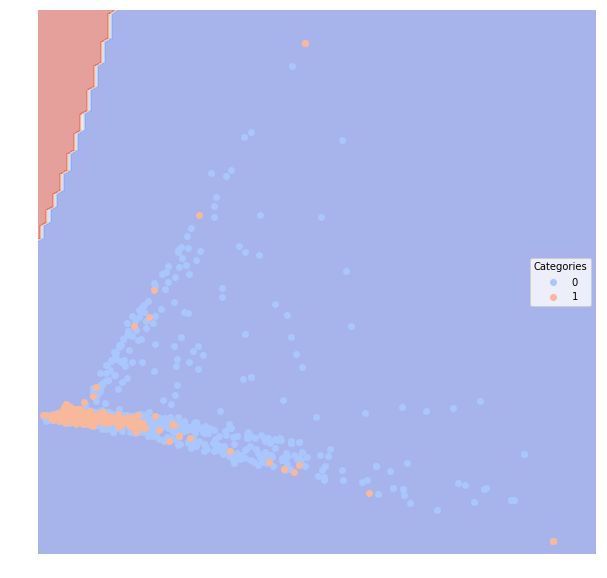

In [120]:
plotregions(neuro, test)